In [6]:
# Load all necessary libraries for EDA.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msng
import os

In [7]:
data = pd.read_csv(r'C:\\Users\\asiminovsky\\Desktop\\GADataScience\\Ali0316\\FinalProject\\Ali Lead Scoring Data.csv')


In [8]:
# Rename columns for simplicity.

data.columns = ['lead_age',
'lead_cohort',
 'lead_type',
 'num_employees',
 'status',
 'lead_campaign',
 'grade',
 'MQL_type',
 'zi_industry',
 'zi_role',
 'zi_company',
 'zi_seniority',
 'zi_num_employees',
 'persona',
 'max_employees',
 'quote_sub',
 'amount_paid',
 'key_title',
 'key_dept',
 'lead_creation_date',
 'campaign',
 'opp_channel',
 'opp_campaign',
 'converted_to_opp',
 'is_converted',
 'pi_campaign',
 'opp_campaign_type',
 'campaign_id',
 'lead_record_type',
 'lead_lead_type',
 'og_lead_source',
 're_MQL_date',
 'lead_pardot_score',
 'lead_pardot_score_2',
 'key_contact_lead_score',
 'hero_points',
 'lead_id',
 'lead_email']

In [9]:
# Drop irrelevant columns.

data = data.drop(['lead_cohort','lead_campaign', 'persona','quote_sub','amount_paid','key_title','key_dept',
          'campaign','opp_channel','opp_campaign','pi_campaign','campaign_id','og_lead_source',
          'lead_pardot_score','key_contact_lead_score','hero_points','lead_id','lead_email'], axis=1)

In [13]:
data = data.drop(['lead_cohort'],axis=1)

KeyError: "['lead_cohort'] not found in axis"

In [15]:
# Convert lead_creation_date to datetime format.
pd.to_datetime(data['lead_creation_date'])

data['lead_creation_date'] =  pd.to_datetime(data['lead_creation_date'], format='%m/%d/%Y %H:%M')

In [16]:
# Identify and delete duplicate rows.
duplicate = data[data.duplicated()]

data.drop_duplicates(inplace=True)

In [17]:
# Most missing values are MNAR and will be retained as missing. For lead_type, change all null values to the mode.

print(data['lead_type'].mode())
data['lead_type'].fillna("Try PI Offer", inplace = True)

# For all null converted_to_opp, replace with boolean False.
data['converted_to_opp'].fillna(False,inplace=True)

0    Try PI Offer
dtype: object


In [18]:
# Create a column containing just the month from lead_creation_date.

data['month'] = data['lead_creation_date'].dt.month

In [19]:
# Check descriptives of float and integer variables in DataFrame and ensure all values make sense.

data.describe()

,lead_age,num_employees,zi_num_employees,max_employees,lead_pardot_score_2,month
count,171668.000000,5.713400e+04,1.968000e+04,9.715000e+03,167880.000000,172042.000000
mean,560.498241,1.572810e+04,1.336755e+04,5.809177e+03,4.484959,5.967932
std,357.206680,1.044829e+05,6.481348e+04,5.248098e+04,186.764334,3.274809
min,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,-992.000000,1.000000
25%,284.000000,9.000000e+01,2.600000e+01,2.000000e+01,0.000000,4.000000
50%,580.000000,3.600000e+02,1.490000e+02,7.500000e+01,5.000000,5.000000
75%,754.000000,3.200000e+03,2.594000e+03,3.500000e+02,36.000000,8.000000
max,1731.000000,2.300000e+06,2.200000e+06,2.200000e+06,20420.000000,12.000000


In [21]:
# Check for correlations.

data.corr()

,lead_age,num_employees,zi_num_employees,max_employees,converted_to_opp,lead_pardot_score_2,month
lead_age,1.000000,0.020231,0.016366,0.007240,-0.385106,-0.011874,0.031465
num_employees,0.020231,1.000000,0.918679,0.696813,-0.016303,0.011354,-0.006396
zi_num_employees,0.016366,0.918679,1.000000,0.882125,-0.022330,-0.027527,-0.006679
max_employees,0.007240,0.696813,0.882125,1.000000,NaN,-0.005955,-0.021903
converted_to_opp,-0.385106,-0.016303,-0.022330,NaN,1.000000,0.164062,0.045131
lead_pardot_score_2,-0.011874,0.011354,-0.027527,-0.005955,0.164062,1.000000,0.115591
month,0.031465,-0.006396,-0.006679,-0.021903,0.045131,0.115591,1.000000


<AxesSubplot:xlabel='converted_to_opp', ylabel='lead_pardot_score_2'>

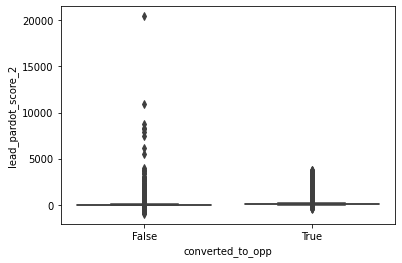

In [22]:
# Make a boxplot of main anticipated relationship: lead score versus opportunity conversion.
sns.boxplot(x="converted_to_opp", y="lead_pardot_score_2", data=data)

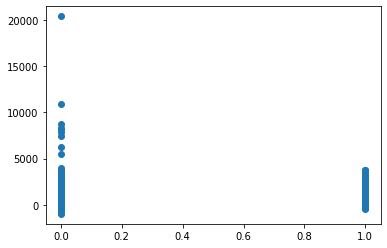

In [23]:
# Create scatterplots of critical anticipated relationships.
print(plt.scatter(data['converted_to_opp'],data['lead_pardot_score_2']))

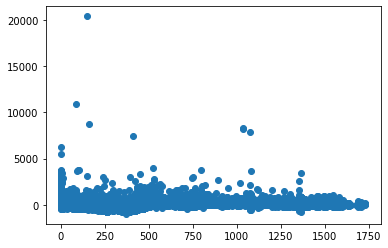

In [24]:
print(plt.scatter(data['lead_age'],data['lead_pardot_score_2']))

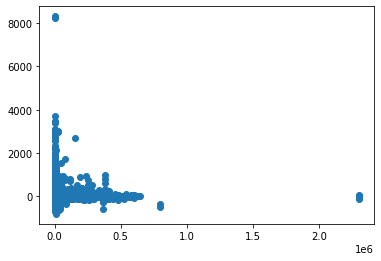

In [25]:
print(plt.scatter(data['num_employees'],data['lead_pardot_score_2']))

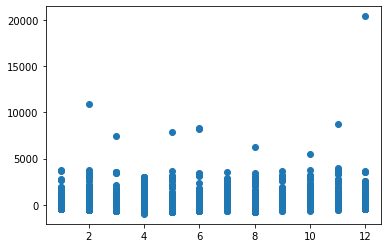

In [26]:
print(plt.scatter(data['month'],data['lead_pardot_score_2']))

In [27]:
# Conclusions: the data are now clean and based on the correlation matrix above, I anticipate finding some relationships between
# the various independent variables and the dependent variable.

## Analysis and Modeling ##

In [28]:
# Enter categorical variables as integers.
data['lead_type'] = pd.factorize(data.lead_type)[0]
data['status'] = pd.factorize(data.status)[0]
data['grade'] = pd.factorize(data.grade)[0]
data['MQL_type'] = pd.factorize(data.MQL_type)[0]
data['zi_industry'] = pd.factorize(data.zi_industry)[0]
data['zi_role'] = pd.factorize(data.zi_role)[0]
data['zi_seniority'] = pd.factorize(data.zi_seniority)[0]
data['is_converted'] = pd.factorize(data.is_converted)[0]
data['opp_campaign_type'] = pd.factorize(data.opp_campaign_type)[0]
data['lead_record_type'] = pd.factorize(data.lead_record_type)[0]
data['lead_lead_type'] = pd.factorize(data.lead_lead_type)[0]
data['re_MQL_date'] = pd.factorize(data.re_MQL_date)[0]
data['converted_to_opp'] = pd.factorize(data.converted_to_opp)[0]

C:\Users\asiminovsky\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


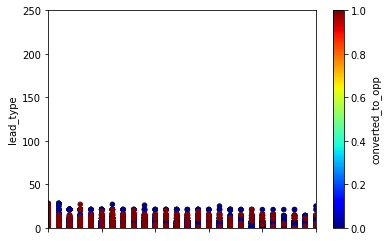

In [29]:
# Create a scatter plot of lead score vs lead type, colored by converted_to_opp. These are the anticipated critical relationships.
data.plot(kind='scatter', x='lead_pardot_score_2', y='lead_type', c='converted_to_opp', colormap='jet', xlim=(0, 25), ylim=(0, 250));

In [30]:
# Open Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz

In [51]:


# Receiving error 'ValueError: Input contains NaN, infinity or a value too large for dtype('float32').'
# Although far from ideal, I am going to impute mean values for NaN to solve this error as per various resources online.

data.fillna(data.mean(), inplace=True)

#rfreg = RandomForestRegressor(n_estimators=150, max_features=5, random_state=1)
#rfreg.fit(X, y)

# Same error still appears, so getting rid of infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.shape



<ipython-input-51-1307346fc345>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


(172042, 21)

In [32]:
# Define features using relevant variables only: Exclude the response variable ('convereted_to_opp')
feature_cols = ['lead_age','lead_type','num_employees','status','grade','MQL_type','month','lead_record_type','lead_pardot_score_2']
feature_cols

['lead_age',
 'lead_type',
 'num_employees',
 'status',
 'grade',
 'MQL_type',
 'month',
 'lead_record_type',
 'lead_pardot_score_2']

In [33]:
# Define X and y
X = data[feature_cols]
y = data.converted_to_opp

In [34]:
# Check class sizes.
y.value_counts()

# The classes are imbalanced, as anticipated. The '0' class (did not convert to an opportunity) is much larger.

0    161366
1     10676
Name: converted_to_opp, dtype: int64

In [35]:
# Define n_estimators and max_features
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=5, n_estimators=150, random_state=1)

In [36]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

# Based on the output, we can see that status (did the lead actually speak to anyone at the company?) is very important, as
# is lead age (how many days has the lead been active?).

,feature,importance
4,grade,0.008062
2,num_employees,0.009918
5,MQL_type,0.011918
1,lead_type,0.028431
6,month,0.037199
8,lead_pardot_score_2,0.052322
7,lead_record_type,0.054099
0,lead_age,0.303245
3,status,0.494807


In [37]:
# Find the average RMSE.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.20487488896602762

In [38]:
# Split the data into train and test samples.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 26)

In [39]:
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [40]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(129031, 2)
(129031, 5)


In [41]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)
X_important

array([[1.000e+00, 5.000e+00],
       [4.790e+02, 3.000e+00],
       [7.540e+02, 3.000e+00],
       ...,
       [3.020e+02, 2.000e+00],
       [1.580e+02, 2.000e+00],
       [1.073e+03, 1.000e+00]])

In [42]:
# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=0.25, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

# As per the below, the RMSE of the model with important features only is lower than the initial model with all features.

0.11158825101056621

In [43]:
from sklearn.ensemble import RandomForestClassifier

X = data[feature_cols]
y = data.converted_to_opp

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 26)

rfreg = RandomForestClassifier(n_estimators=150, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=1)

In [44]:
y_pred = rfreg.predict(X_test)

In [45]:
# Run a classification report to examine accuracy.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# The model's accuracy and precision are extremely high. HOWEVER, this must be interpreted with caution as the classes are 
# extremely imbalanced, with the second class's size being a fraction of the first's.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40319
           1       0.89      0.95      0.92      2692

    accuracy                           0.99     43011
   macro avg       0.94      0.97      0.96     43011
weighted avg       0.99      0.99      0.99     43011



In [46]:
# Run a confusion matrix to further examine accuracy.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# The confusion matrix indicates 40,008 true negatives, 2,559 true positives, 311 false positives, and 133 false negatives.
# While the numbers of false hits/misses are large, the numbers of true hits/misses are considerably larger,
# suggesting that this model containing lead age and lead status predicts conversion status relatively accurately.

array([[40008,   311],
       [  133,  2559]], dtype=int64)

In [48]:
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz

In [49]:
# Spent about ten non-consecutive hours trying to get a visual of a single tree. Leaving the syntax here for feedback.

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X, y)
# Extract single tree
estimator = model.estimators_[9]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot')#, 
               # feature_names = X,
                #class_names = iris.target_names,
                #rounded = True, proportion = False, 
                #precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Overall Conclusions ###

A majorly reduced random forests model containing only the lead age and lead status features predicted conversion status with the least amount of error and with promising accuracy and hit rate statistics. Given that the initial problem was largely structured around the role of the lead score in predicting conversion status, it is clear that the organization should reconsider the role of lead scoring--it does not appear to be valuable in its current state, and it's questionable as to whether it is worthwhile even with improvements.